In [53]:
import pandas as pd
import numpy as np

## 读取数据

In [54]:
credit = pd.read_csv('../../data/credit.csv')

In [55]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36457 non-null  int64  
 1   ID                   36457 non-null  int64  
 2   CODE_GENDER          36457 non-null  object 
 3   FLAG_OWN_CAR         36457 non-null  object 
 4   FLAG_OWN_REALTY      36457 non-null  object 
 5   CNT_CHILDREN         36457 non-null  int64  
 6   AMT_INCOME_TOTAL     36457 non-null  float64
 7   NAME_INCOME_TYPE     36457 non-null  object 
 8   NAME_EDUCATION_TYPE  36457 non-null  object 
 9   NAME_FAMILY_STATUS   36457 non-null  object 
 10  NAME_HOUSING_TYPE    36457 non-null  object 
 11  DAYS_BIRTH           36457 non-null  int64  
 12  DAYS_EMPLOYED        36457 non-null  int64  
 13  FLAG_MOBIL           36457 non-null  int64  
 14  FLAG_WORK_PHONE      36457 non-null  int64  
 15  FLAG_PHONE           36457 non-null 

In [56]:
credit.head()

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


## 丢弃无用columns

In [57]:
credit = credit.drop(columns=['Unnamed: 0','dep_value'], axis=1)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

## 处理columns


In [58]:
credit['month_on_book'] = -credit['begin_month']
# 将年龄和工龄转换为年
credit['DAYS_BIRTH'] = -credit['DAYS_BIRTH'] / 365
credit['DAYS_EMPLOYED'] = credit['DAYS_EMPLOYED'] / 365
credit.rename(columns={'DAYS_BIRTH': 'age', 'DAYS_EMPLOYED':'work_year'}, inplace=True)
credit.drop(columns='begin_month', axis=1, inplace=True)
# 将工资按照 'k'为单位
credit['AMT_INCOME_TOTAL'] = credit['AMT_INCOME_TOTAL'] / 1000
# 处理flag类二分数据
dic = {'Y': 1, 'N': 0}
credit['FLAG_OWN_CAR'] = credit['FLAG_OWN_CAR'].replace(dic)
credit['FLAG_OWN_REALTY'] = credit['FLAG_OWN_REALTY'].replace(dic)
credit['CODE_GENDER'] = credit['CODE_GENDER'].replace({'M':1, 'F':0})

In [59]:
credit

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
0,5008804,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,15.0
1,5008805,1,1,1,0,427.5,Working,Higher education,Civil marriage,Rented apartment,32.890411,-12.443836,1,1,0,0,NaN,2.0,0,14.0
2,5008806,1,1,1,0,112.5,Working,Secondary / secondary special,Married,House / apartment,58.832877,-3.106849,1,0,0,0,Security staff,2.0,0,29.0
3,5008808,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,4.0
4,5008809,0,0,1,0,270.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,-8.358904,1,0,1,1,Sales staff,1.0,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315.0,Working,Secondary / secondary special,Married,House / apartment,47.528767,-6.630137,1,0,0,0,Managers,2.0,1,11.0
36453,5149834,0,0,1,0,157.5,Commercial associate,Higher education,Married,House / apartment,33.936986,-3.630137,1,0,1,1,Medicine staff,2.0,1,23.0
36454,5149838,0,0,1,0,157.5,Pensioner,Higher education,Married,House / apartment,33.936986,-3.630137,1,0,1,1,Medicine staff,2.0,1,32.0
36455,5150049,0,0,1,0,283.5,Working,Secondary / secondary special,Married,House / apartment,49.200000,-1.794521,1,0,0,0,Sales staff,2.0,1,9.0


In [60]:
credit.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
age                        0
work_year                  0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
target                     0
month_on_book              0
dtype: int64

可以看出职业一栏有许多空数据

In [61]:
# 对于缺失的工作column，由于其缺失值 11323过大，我们对其该column进行舍弃
credit['OCCUPATION_TYPE'].fillna('unknown', inplace=True)
credit['OCCUPATION_TYPE'].value_counts()
# try
# credit = credit.dropna()
# credit.drop(columns='OCCUPATION_TYPE', inplace=True)

unknown                  11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

这样就处理了工作类型的缺失值

## 数据分析及处理

In [62]:
# 二分类对应列
flag_col = [i for i in credit.columns if i.startswith('FLAG_')]

In [63]:
from matplotlib import pyplot as plt

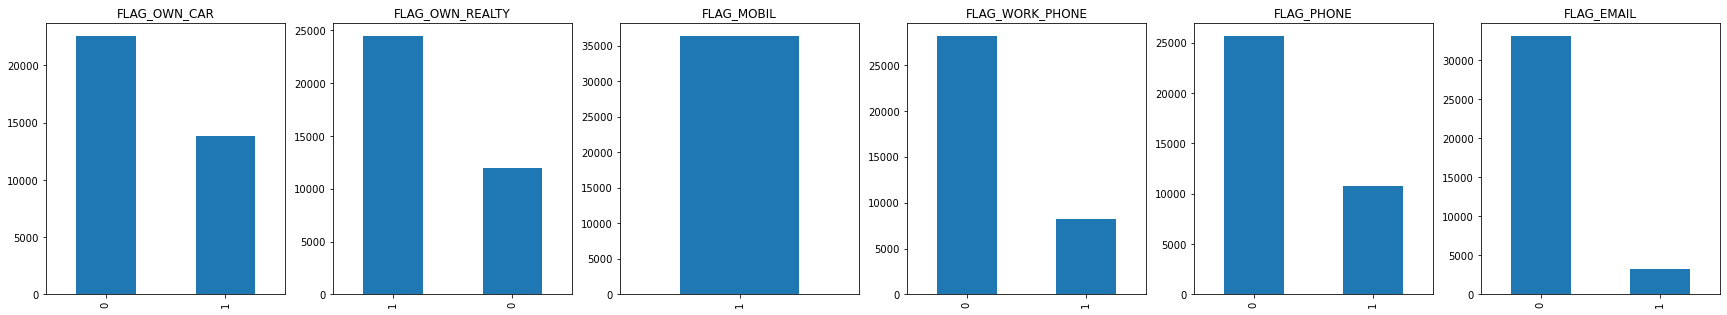

In [64]:
_, axes = plt.subplots(ncols=len(flag_col), figsize=(30, 5))
for col, ax in zip(flag_col, axes):
    credit[col].value_counts().plot(kind='bar', ax=ax, title=col)
plt.show()

In [65]:
# 由上图可知，FLAG_MOBIL全部为1，显然可以消除
credit.drop(columns='FLAG_MOBIL', axis=1, inplace=True)

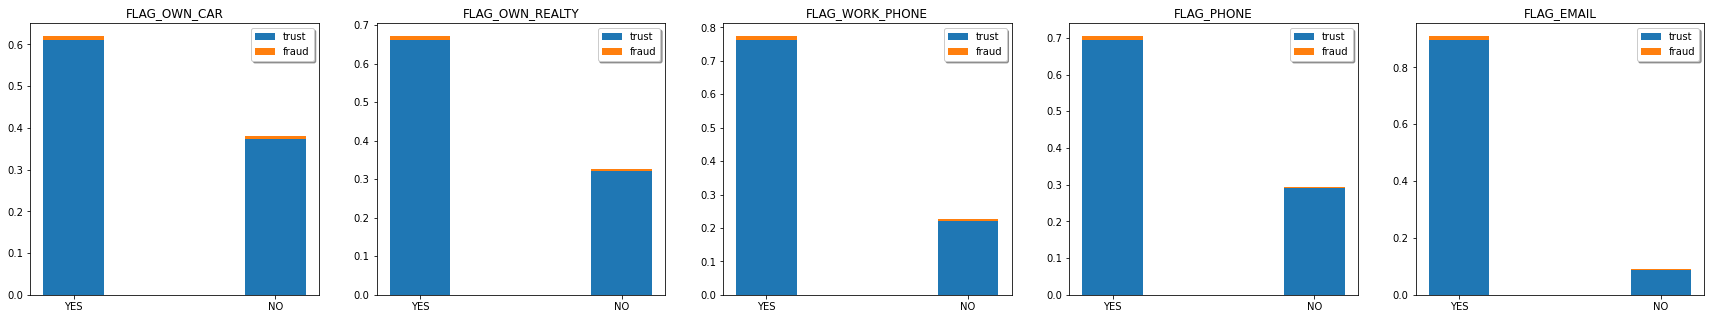

In [66]:
# 堆积图
flag_col = [i for i in credit.columns if i.startswith('FLAG_')]
_, axes = plt.subplots(ncols=len(flag_col), figsize=(30, 5))
index = np.arange(2)
for col, ax in zip(flag_col, axes):
    total = credit[col].value_counts().sum()
    trust = credit[credit['target'] == 0][col].value_counts() / total
    fraud = credit[credit['target'] == 1][col].value_counts() / total
    ax.set_title(col)
    ax.bar(index, trust, width=0.3, label = 'trust')
    ax.bar(index, fraud, width=0.3, bottom = trust, label = 'fraud')
    ax.set_xticks(index)
    ax.set_xticklabels(['YES', 'NO'])
    ax.legend(loc='right upper', shadow=True)


In [67]:
name_cols = [col for col in credit.columns if col.startswith('NAME_')]

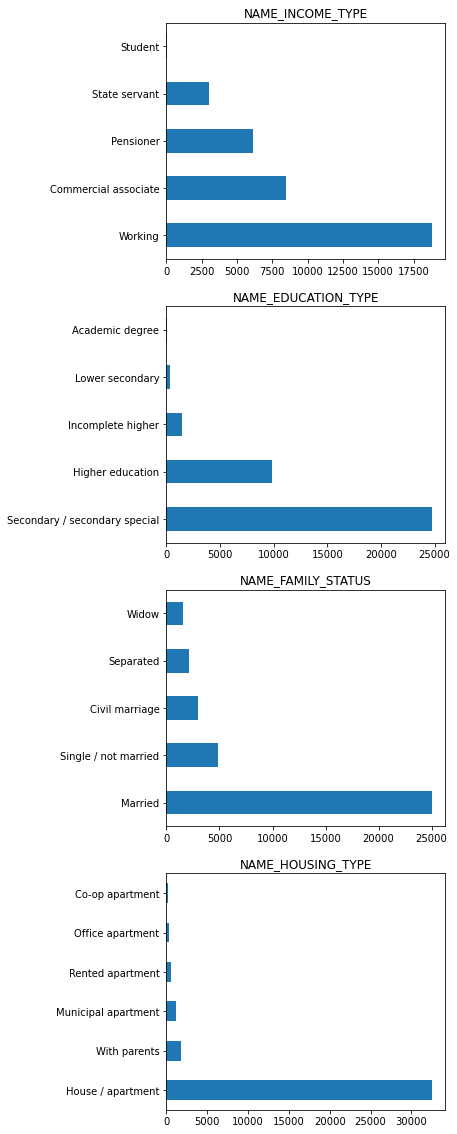

In [68]:
_, axes = plt.subplots(nrows=len(name_cols), figsize=(5, 20))
for col, ax in zip(name_cols, axes):
    credit[col].value_counts().plot(kind='barh', ax=ax, title=col)
plt.show()

In [69]:
amt_cols = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'month_on_book', 'age', 'work_year']

In [70]:
import seaborn as sns

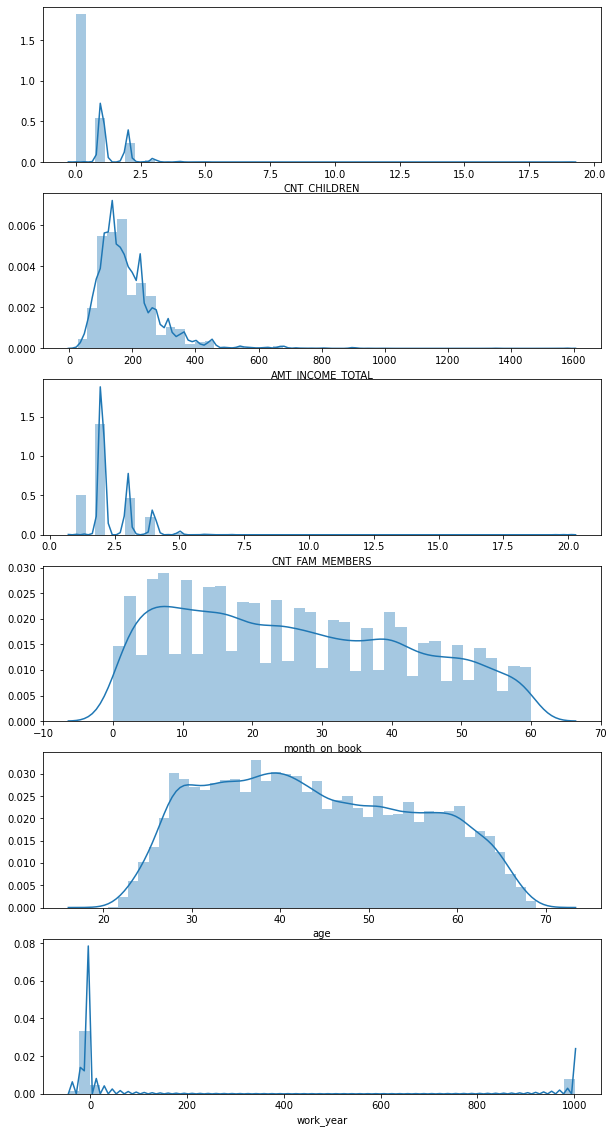

In [71]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.distplot(credit[col], ax=ax)
plt.show()

In [72]:
desc = round(credit[amt_cols].describe(), 0)
desc

,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,month_on_book,age,work_year
count,36457.0,36457.0,36457.0,36457.0,36457.0,36457.0
mean,0.0,187.0,2.0,26.0,44.0,162.0
std,1.0,102.0,1.0,17.0,12.0,377.0
min,0.0,27.0,1.0,-0.0,21.0,-43.0
25%,0.0,122.0,2.0,12.0,34.0,-9.0
50%,0.0,158.0,2.0,24.0,43.0,-4.0
75%,1.0,225.0,3.0,39.0,53.0,-1.0
max,19.0,1575.0,20.0,60.0,69.0,1001.0


In [73]:
credit[credit['work_year'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,month_on_book
7,5008812,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,unknown,1.0,0,20.0
8,5008813,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,unknown,1.0,0,16.0
9,5008814,0,0,1,0,283.5,Pensioner,Higher education,Separated,House / apartment,61.545205,1000.665753,0,0,0,unknown,1.0,0,17.0
69,5008884,0,0,1,0,315.0,Pensioner,Secondary / secondary special,Widow,House / apartment,55.304110,1000.665753,0,0,0,unknown,1.0,0,40.0
150,5008974,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Married,House / apartment,61.147945,1000.665753,0,0,0,unknown,2.0,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36408,5126278,0,0,0,0,162.0,Pensioner,Secondary / secondary special,Married,House / apartment,58.202740,1000.665753,0,0,0,unknown,2.0,1,28.0
36418,5139446,0,0,1,0,112.5,Pensioner,Secondary / secondary special,Widow,House / apartment,58.235616,1000.665753,0,1,0,unknown,1.0,1,16.0
36432,5145690,0,0,1,0,306.0,Pensioner,Higher education,Married,House / apartment,59.150685,1000.665753,0,0,0,unknown,2.0,1,17.0
36434,5145817,0,0,1,0,90.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.304110,1000.665753,0,0,0,unknown,2.0,1,39.0


有6135条数据存在work_year异常值，且全部为退休人员

In [74]:
# 使用插值法，将异常值替换为去掉异常值之后的平均值
credit.loc[credit['work_year'] > 0, 'work_year'] = credit[credit['work_year'] < 0]['work_year'].max()
credit['work_year'] = -credit['work_year']

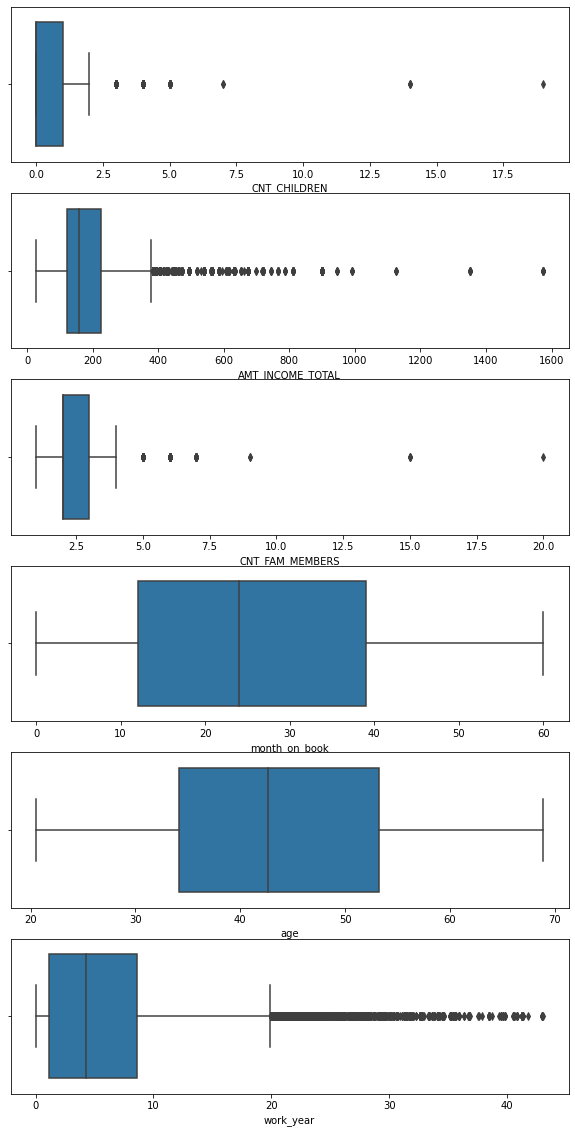

In [75]:
_, axes = plt.subplots(nrows=len(amt_cols), figsize=(10, 20))
for col, ax in zip(amt_cols, axes):
    sns.boxplot(credit[col], ax=ax)
plt.show()

## 变量相关性

In [76]:
credit.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,age,work_year,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,target,month_on_book
count,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.329895,0.379708,0.672189,0.430315,186.685737,43.767598,6.036104,0.225526,0.294813,0.089722,2.198453,0.016897,26.164193
std,4.187524e+04,0.470181,0.485321,0.469422,0.742367,101.789226,11.508356,6.477107,0.417934,0.455965,0.285787,0.911686,0.128886,16.501854
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,27.000000,20.517808,0.046575,0.000000,0.000000,0.000000,1.000000,0.000000,-0.000000
25%,5.042028e+06,0.000000,0.000000,0.000000,0.000000,121.500000,34.142466,1.117808,0.000000,0.000000,0.000000,2.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,0.000000,1.000000,0.000000,157.500000,42.638356,4.252055,0.000000,0.000000,0.000000,2.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,1.000000,1.000000,1.000000,225.000000,53.254795,8.638356,0.000000,1.000000,0.000000,3.000000,0.000000,39.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1575.000000,68.909589,43.049315,1.000000,1.000000,1.000000,20.000000,1.000000,60.000000


18


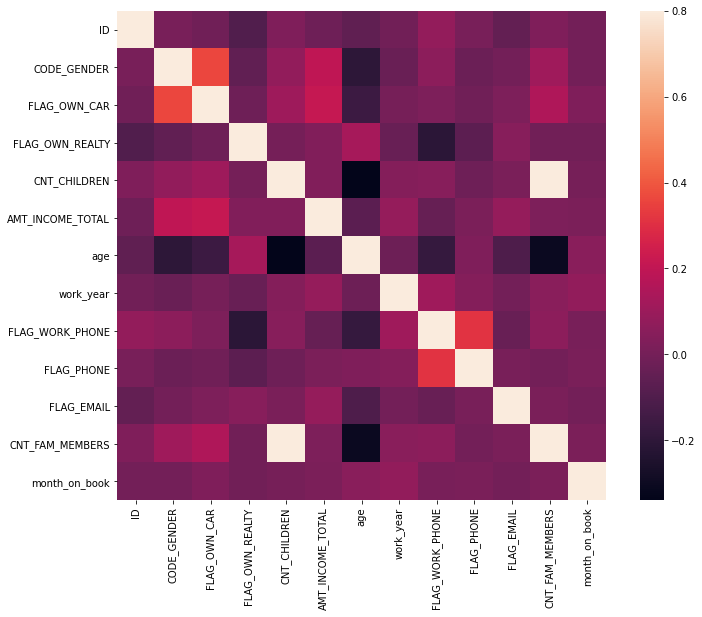

In [77]:
feat_cols: list = credit.columns.to_list()
feat_cols.remove('target')
feat_cols
credit_train:pd.DataFrame = credit[feat_cols]
corr_mat = credit_train.corr()
_, _ = plt.subplots(figsize=(12, 9))
print(len(feat_cols))
sns.heatmap(corr_mat, vmax=.8, square=True)

小孩个数和家庭成员个数显然相关

* ### 小孩个数

In [78]:
credit.drop(columns='CNT_CHILDREN', inplace=True)

可以看出有超过2个小孩的家庭占少数，应当进行合并

* ### 家庭成员个数

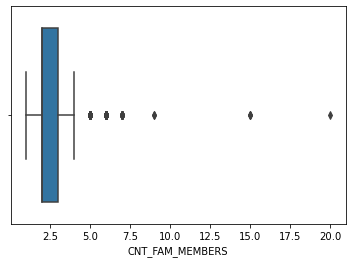

In [79]:
# 将3个及其以上的家庭CNT_FAM_MEMBERS设为more
sns.boxplot(credit['CNT_FAM_MEMBERS'])
credit.loc[credit['CNT_FAM_MEMBERS'] >= 3, 'CNT_FAM_MEMBERS'] = 'more'

In [80]:
credit['CNT_FAM_MEMBERS'].value_counts()

2.0     19463
more    10007
1.0      6987
Name: CNT_FAM_MEMBERS, dtype: int64

* ## 住房情况

In [81]:
credit['NAME_HOUSING_TYPE'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [82]:
# 我们将用户划分为 拥有/无 住房和公寓（1/0），从而将上述多类型变量转换为二分类 HOUSING_STATUS
credit['housing-status'] = credit['NAME_HOUSING_TYPE'].apply(lambda x: 1 if x == 'House / apartment' else 0)
credit.drop(columns='NAME_HOUSING_TYPE', inplace=True)
credit['housing-status'].value_counts()

1    32548
0     3909
Name: housing-status, dtype: int64

* ### 婚姻情况

In [83]:
credit['NAME_FAMILY_STATUS'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64

In [84]:
credit['marriage_status'] = credit['NAME_FAMILY_STATUS'].apply(lambda x: 1 if (x == 'Married' or x == 'Civil marriage') else 0)
credit.drop(columns='NAME_FAMILY_STATUS', inplace=True)

In [85]:
credit['marriage_status'].value_counts()

1    27993
0     8464
Name: marriage_status, dtype: int64

* ## 无量纲化

In [86]:
# from sklearn.preprocessing import StandardScaler, RobustScaler
# scl = StandardScaler()
# rbs = RobustScaler()
# # 年龄和帐龄几乎无离群值，正常处理
# scl_data = scl.fit_transform(credit[['age', 'month_on_book']])
# # 离群值较多使用 RobustScaler 处理
# rbs_data = rbs.fit_transform(credit[['work_year', 'AMT_INCOME_TOTAL']])
# credit[['age', 'month_on_book']] = scl_data
# credit[['work_year', 'AMT_INCOME_TOTAL']] = rbs_data

In [87]:
#读取数据集，至少包含变量和target两列
sample_set = credit
 
def calc_score_median(sample_set, var):
    '''
    计算相邻评分的中位数，以便进行决策树二元切分
    param sample_set: 待切分样本
    param var: 分割变量名称
    '''
    var_list = list(np.unique(sample_set[var]))
    var_median_list = []
    for i in range(len(var_list) -1):
        var_median = (var_list[i] + var_list[i+1]) / 2
        var_median_list.append(var_median)
    return var_median_list

In [88]:
def choose_best_split(sample_set, var, min_sample):
    '''
    使用CART分类决策树选择最好的样本切分点
    返回切分点
    param sample_set: 待切分样本
    param var: 分割变量名称
    param min_sample: 待切分样本的最小样本量(限制条件)
    '''
    # 根据样本评分计算相邻不同分数的中间值
    score_median_list = calc_score_median(sample_set, var)
    median_len = len(score_median_list)
    sample_cnt = sample_set.shape[0]
    sample1_cnt = sum(sample_set['target'])
    sample0_cnt =  sample_cnt- sample1_cnt
    Gini = 1 - np.square(sample1_cnt / sample_cnt) - np.square(sample0_cnt / sample_cnt)
    
    bestGini = 0.0; bestSplit_point = 0.0; bestSplit_position = 0.0
    for i in range(median_len):
        left = sample_set[sample_set[var] < score_median_list[i]]
        right = sample_set[sample_set[var] > score_median_list[i]]
        
        left_cnt = left.shape[0]; right_cnt = right.shape[0]
        left1_cnt = sum(left['target']); right1_cnt = sum(right['target'])
        left0_cnt =  left_cnt - left1_cnt; right0_cnt =  right_cnt - right1_cnt
        left_ratio = left_cnt / sample_cnt; right_ratio = right_cnt / sample_cnt
        
        if left_cnt < min_sample or right_cnt < min_sample:
            continue
        
        Gini_left = 1 - np.square(left1_cnt / left_cnt) - np.square(left0_cnt / left_cnt)
        Gini_right = 1 - np.square(right1_cnt / right_cnt) - np.square(right0_cnt / right_cnt)
        Gini_temp = Gini - (left_ratio * Gini_left + right_ratio * Gini_right)
        if Gini_temp > bestGini:
            bestGini = Gini_temp; bestSplit_point = score_median_list[i]
            if median_len > 1:
                bestSplit_position = i / (median_len - 1)
            else:
                bestSplit_position = i / median_len
        else:
            continue
               
    Gini = Gini - bestGini
    return bestSplit_point, bestSplit_position

In [89]:
def bining_data_split(sample_set, var, min_sample, split_list):
  '''
  划分数据找到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  param min_sample: 待切分样本的最小样本量(限制条件)
  param split_list: 最优分割点list
  '''
  split, position = choose_best_split(sample_set, var, min_sample)
  if split != 0.0:
    split_list.append(split)
  # 根据分割点划分数据集，继续进行划分
  sample_set_left = sample_set[sample_set[var] < split]
  sample_set_right = sample_set[sample_set[var] > split]
  # 如果左子树样本量超过2倍最小样本量，且分割点不是第一个分割点，则切分左子树
  if len(sample_set_left) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_left, var, min_sample, split_list)
  else:
    None
  # 如果右子树样本量超过2倍最小样本量，且分割点不是最后一个分割点，则切分右子树
  if len(sample_set_right) >= min_sample * 2 and position not in [0.0, 1.0]:
    bining_data_split(sample_set_right, var, min_sample, split_list)
  else:
    None

In [90]:
def get_bestsplit_list(sample_set, var):
  '''
  根据分箱得到最优分割点list
  param sample_set: 待切分样本
  param var: 分割变量名称
  '''
  # 计算最小样本阈值（终止条件）
  min_df = sample_set.shape[0] * 0.05
  split_list = []
  # 计算第一个和最后一个分割点
  bining_data_split(sample_set, var, min_df, split_list)
  return split_list

In [91]:
def split_name(x, sp_list, feat_name):
    name = feat_name + '_'
    no = 1
    if x < sp_list[0]:
        return name + '0'
    for i in range(len(sp_list) - 1):
        if x > sp_list[i] and x < sp_list[i + 1]:
            return name + str(no)
        else:
            no += 1
    return name + str(len(sp_list))

new_df = credit.copy()
split_list = get_bestsplit_list(sample_set, 'AMT_INCOME_TOTAL')        
new_df['AMT_INCOME_TOTAL'] = new_df['AMT_INCOME_TOTAL'].apply(func=split_name, args=(split_list, 'income'))
new_df['AMT_INCOME_TOTAL'].value_counts()

split_list = get_bestsplit_list(sample_set, 'age')
new_df['age'] = new_df['age'].apply(func=split_name, args=(split_list, 'age'))
new_df['age'].value_counts()

split_list = get_bestsplit_list(sample_set, 'work_year')
new_df['work_year'] = new_df['work_year'].apply(func=split_name, args=(split_list, 'work_year'))
new_df['work_year'].value_counts()

split_list = get_bestsplit_list(sample_set, 'month_on_book')
new_df['month_on_book'] = new_df['month_on_book'].apply(func=split_name, args=(split_list, 'month_on_book'))
new_df['month_on_book'].value_counts()

index = np.arange(new_df['age'].nunique())
plt.bar(index, new_df['age'].value_counts() / new_df['age'].value_counts().sum())
plt.xticks(index, labels=new_df['age'].unique())
plt.show()

def iv_woe(data:pd.DataFrame, target:str, bins:int = 10) -> (pd.DataFrame, pd.DataFrame):
    """计算woe和IV值
    
    参数：
    - data: dataframe数据
    - target: y列的名称
    - bins: 分箱数（默认是10）
    """
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    for ivars in cols[~cols.isin([target])]:
        # 数据类型在bifc中、且数据>10则分箱
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)
    return newDF, woeDF

new_DF, woeDF = iv_woe(new_df, 'target', bins=20)
new_DF.sort_values(by='IV')

In [92]:
credit = credit.drop(columns=['FLAG_EMAIL', 'FLAG_WORK_PHONE', 'housing-status'])

In [93]:
credit.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'age',
       'work_year', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'month_on_book', 'marriage_status'],
      dtype='object')

In [94]:
credit['CNT_FAM_MEMBERS'].unique()

array([2.0, 1.0, 'more'], dtype=object)

## 使用SMOTEENN过采样+分割数据集

In [95]:
# 画出混淆矩阵
def draw_cm(cm, classes, title='Confused Matrix'):
    indices = range(len(cm))
    plt.title(title)
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.xticks(indices, classes)
    plt.yticks(indices, classes)
    plt.colorbar()
    cm = cm / cm.sum(axis=0)[:, ]
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(i, j, format(cm[i][j], '.2f'),
                     horizontalalignment='center')


# 画学习曲线
def draw_learn_curve(model, x, y):
    train_sizes, train_score, test_score = learning_curve(
        model, x, y, train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1], cv=5, scoring='roc_auc'
    )
    train_mean = np.mean(train_score, axis=1)
    test_mean = np.mean(test_score, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='training')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='testing')
    plt.legend(loc='best')
    plt.xlabel('traing examples')
    plt.ylabel('Score')
    plt.show()

In [96]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [97]:
credit = pd.get_dummies(credit)
feat_cols = credit.columns.to_list()
feat_cols.remove('ID')
feat_cols.remove('target')
X, Y = credit[feat_cols], credit['target']
Y = Y.astype(int)

In [98]:
from sklearn.model_selection import train_test_split
X, Y = SMOTE().fit_resample(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# X_b, Y_b = SMOTEENN().fit_resample(X_train, Y_train)

In [99]:
from xgboost import XGBClassifier, plot_importance

In [100]:
from sklearn import metrics

In [101]:
from sklearn.model_selection import learning_curve
import numpy as np

In [102]:
# 欠采样
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
# X_b2, Y_b2 = rus.fit_resample(X_train, Y_train)

In [103]:
from sklearn.model_selection import GridSearchCV

In [130]:
import pickle

* ## Xgboost

In [105]:
# xg_train = xgboost.DMatrix(X_b, Y_b)
# xg = XGBClassifier()
# xg_cv_res = xgboost.cv(xg.get_xgb_params(), dtrain=xg_train, nfold=5, num_boost_round=500 ,metrics=['auc'])
# xg.set_params(n_estimators=xg_cv_res.shape[0])

In [106]:
 cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
# 1. n_estimators = 800
# 2. max_depth = 9 / 10
# 3. min_child_weight = 6 / 3 / 1
# 4. gamma = 0.3 / 14081632653061227
# 5. subsample = 0.8 / 0.7
# 6. colsample_bytree = 0.8 / 0.6
# 7. reg_alpha = 0.05
# 8. reg_lamda = 0.05
# 9. learning_rate = 0.1
other_params = {'learning_rate': 0.1, 'n_estimators': 800, 'max_depth': 2, 'min_child_weight': 3, 'seed': 0,'subsample': 0.7, 'colsample_bytree': 0.6, 'gamma': 0.3, 'reg_alpha': 0.05, 'reg_lambda': 0.05}
xg = XGBClassifier(**other_params)

In [107]:
# 调参数 n_estimators_1
# opt_xg = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='roc_auc', cv=5, n_jobs=-1)
# opt_xg.fit(X_b2, Y_b2)
# opt_xg.best_params_

In [127]:
xg.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0.05, reg_lambda=0.05, scale_pos_weight=1, seed=0,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [128]:
# 保存模型
with open('xg.pickle', 'wb') as fw:
    pickle.dump(xg, fw)

In [110]:
xg_y_pred = xg.predict(X_test)

In [111]:
metrics.accuracy_score(xg_y_pred, Y_test)

0.9576377586607766

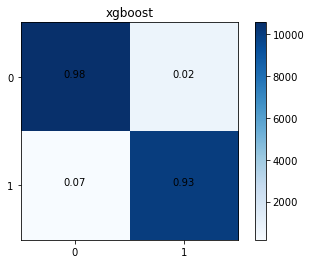

In [112]:
cm = metrics.confusion_matrix(xg_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='xgboost')

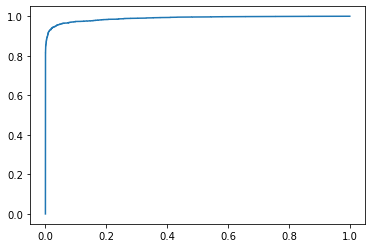

In [113]:
xg_y_score = xg.predict_proba(X_test)
xg_fpr, xg_tpr, x_threasholds = metrics.roc_curve(Y_test, xg_y_score[:, 1])
plt.plot(xg_fpr, xg_tpr)

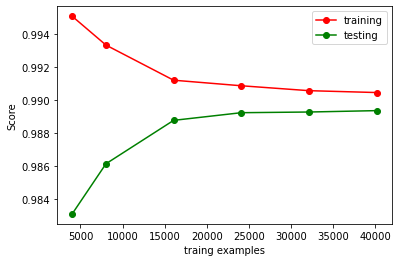

In [114]:
draw_learn_curve(xg, X_train, Y_train)

In [115]:
metrics.auc(xg_fpr, xg_tpr)

0.9895373561547186

* ## SVM

In [116]:
from sklearn.svm import SVC
# lsvc = LinearSVC(C=3, max_iter=68, tol=1.41)
svc = SVC(C=4, tol=1, cache_size=100)
svc.get_params()

{'C': 4,
 'break_ties': False,
 'cache_size': 100,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 1,
 'verbose': False}

In [117]:
# gs_lsvc = GridSearchCV(lsvc, param_grid=lsvc_params, n_jobs=-1, scoring='roc_auc', cv=5)
# gs_lsvc.fit(X_train, Y_train)
# gs_lsvc.best_params_

In [118]:
# 准确率
svc.fit(X_train, Y_train)
svc_y_pred = svc.predict(X_test)
print(f"SVM accuray: {metrics.accuracy_score(svc_y_pred, Y_test)}")

SVM accuray: 0.8248314345501047


In [119]:
# 保存模型
with open('svc.pickle', 'wb') as fw:
    pickle.dump(svc, fw)

In [120]:
draw_learn_curve(svc, X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
cm = metrics.confusion_matrix(svc_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='svm')

In [ ]:
svc_y_score = svc.decision_function(X_test)
svc_fpr, svc_tpr, svc_threasholds = metrics.roc_curve(Y_test, svc_y_score)
plt.plot(svc_fpr, svc_tpr)

In [ ]:
metrics.auc(svc_fpr, svc_tpr)

* ## 随机森林

In [121]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=12, n_estimators=20)
rf.fit(X_train, Y_train)
rf_y_pred = rf.predict(X_test)

In [122]:
# 保存模型
with open('rf.pickle', 'wb') as fw:
    pickle.dump(rf, fw)

In [ ]:
# 准确率
print(f'Random forest accuray: {metrics.accuracy_score(rf_y_pred, Y_test)}')


In [ ]:
cm = metrics.confusion_matrix(rf_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='Random Forest')

In [ ]:
draw_learn_curve(rf, X_train, Y_train)

In [ ]:
rf_y_score = rf.predict_proba(X_test)
rf_fpr, rf_tpr, rf_threasholds = metrics.roc_curve(Y_test, rf_y_score[:, 1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(rf_fpr, rf_tpr)

In [ ]:
metrics.auc(rf_fpr, rf_tpr)

* ## 回归分类

In [123]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_y_pred = lr.predict(X_test)


In [124]:
# 保存模型
with open('lr.pickle', 'wb') as fw:
    pickle.dump(lr, fw)

In [ ]:
# Grid Search
# 1. C = 1.894736842105263
# 2. max_iter = 1.05
# 3. tol = 0.0
# gs_lr = GridSearchCV(estimator=lr, param_grid=lr_params, scoring='roc_auc', n_jobs=-1, cv=5) 
# gs_lr.fit(X_b2, Y_b2)
# gs_lr.best_params_

In [ ]:
# 准确率
print(f'logistic accuray: {metrics.accuracy_score(lr_y_pred, Y_test)}')

In [ ]:
draw_learn_curve(lr, X_train, Y_train)

In [ ]:
cm = metrics.confusion_matrix(lr_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='logistic')

In [ ]:
lr_y_score = lr.predict_proba(X_test)
lr_fpr, lr_tpr, lr_threasholds = metrics.roc_curve(Y_test, lr_y_score[:, 1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(lr_fpr, lr_tpr)

In [ ]:
metrics.auc(lr_fpr, lr_tpr)

* ## LightGBM

In [125]:
import lightgbm
params = {
 'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'num_leaves': 31,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0
}
g_params = {
    'min_child_samples': range(1, 100),
}
# ltg = lightgbm.LGBMClassifier(n_jobs=-1, learning_rate=0.08)
ltg = lightgbm.LGBMClassifier(n_jobs=-1, max_depth = 4, learning_rate=0.2)
ltg.fit(X_train, Y_train)
ltg_y_pred = ltg.predict(X_test)

In [126]:
# 保存模型
with open('lightgbm.pickle', 'wb') as fw:
    pickle.dump(ltg, fw)

In [ ]:
print(f'lightGBM accuray: {metrics.accuracy_score(ltg_y_pred, Y_test)}')

In [ ]:
draw_learn_curve(ltg, X_train, Y_train)

In [ ]:
cm = metrics.confusion_matrix(ltg_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='lightGBM')

In [ ]:
ltg_y_score = ltg.predict_proba(X_test)
ltg_fpr, ltg_tpr, ltg_threasholds = metrics.roc_curve(Y_test, ltg_y_score[:, 1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(ltg_fpr, ltg_tpr)

In [ ]:
metrics.auc(ltg_fpr, ltg_tpr)

* ## 神经网络

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(activation='relu', learning_rate_init=0.1)
mlp.fit(X_train, Y_train)
mlp_y_pred = mlp.predict(X_test)
mlp.get_params()

In [ ]:
# 准确率
metrics.accuracy_score(mlp_y_pred, Y_test)

In [ ]:
draw_learn_curve(mlp, X_train, Y_train)

In [ ]:
cm = metrics.confusion_matrix(mlp_y_pred, Y_test)
draw_cm(cm, list(set(Y_test)), title='MLP')

In [ ]:
mlp_y_score = mlp.predict_proba(X_test)
mlp_fpr, mlp_tpr, mlp_threasholds = metrics.roc_curve(Y_test, mlp_y_score[:, 1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(mlp_fpr, mlp_tpr)

In [ ]:
metrics.auc(mlp_fpr, mlp_tpr)